In [1]:
from keras.models import Sequential
from keras.layers import Dense
from PIL import Image
import cv2
import numpy as np
import os 
from sklearn.decomposition import PCA 

Using TensorFlow backend.


In [2]:
#Data preprocessing 
data = []
label = []
unqiue_label = []
for files in os.listdir('../Dataset'):
    f = files.split('_')[0].split('O')[0].split('o')[0]
    if(f!='.DS'):
        tempimage =  cv2.imread('../Dataset/'+files)
        tempgray = cv2.cvtColor(tempimage, cv2.COLOR_BGR2GRAY)  
        tempresize = cv2.resize(tempgray,(100,100),interpolation = cv2.INTER_AREA)   
        tempNP = np.array(tempresize)
        tempNP = tempNP.flatten()

        data.append(tempNP);
        label.append(f);
        if( f not in unqiue_label ):
            print(f)
            unqiue_label.append(f)

data = np.array(data)
data = data
print("data")
print(data[0])

17440004
1744001
1744002
1744003
1849004
201501004
201501007
201501008
201501009
201501011
201501012
201501021
201501025
201501028
201501031
201501032
201501034
201501038
201501039
201501051
201501053
201501054
201501055
201501060
201501067
201501070
201501071
201501077
201501079
201501086
201501088
201501091
201501095
201501097
201501101
201501104
201501109
201501112
201501121
data
[206 207 208 ...,  10  10  10]


In [22]:
print(data.shape)

tempPCA = PCA(n_components=50)
tempPCA.fit(data)


x = tempPCA.transform(data)
print(x.shape)
label = np.array(label)

#np.save('X.npy',tempPCA);
#np.save('label.npy', np.array(label));

(584, 10000)
(584, 50)


In [23]:
import matplotlib.pyplot as plt

def plot_gallery(images, titles, h, w, n_row=5, n_col=10): 
    """Helper function to plot a gallery of portraits""" 
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row)) 
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35) 
    for i in range(n_row * n_col): 
        plt.subplot(n_row, n_col, i + 1) 
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray) 
        plt.title(titles[i], size=12) 
        plt.xticks(()) 
        plt.yticks(())

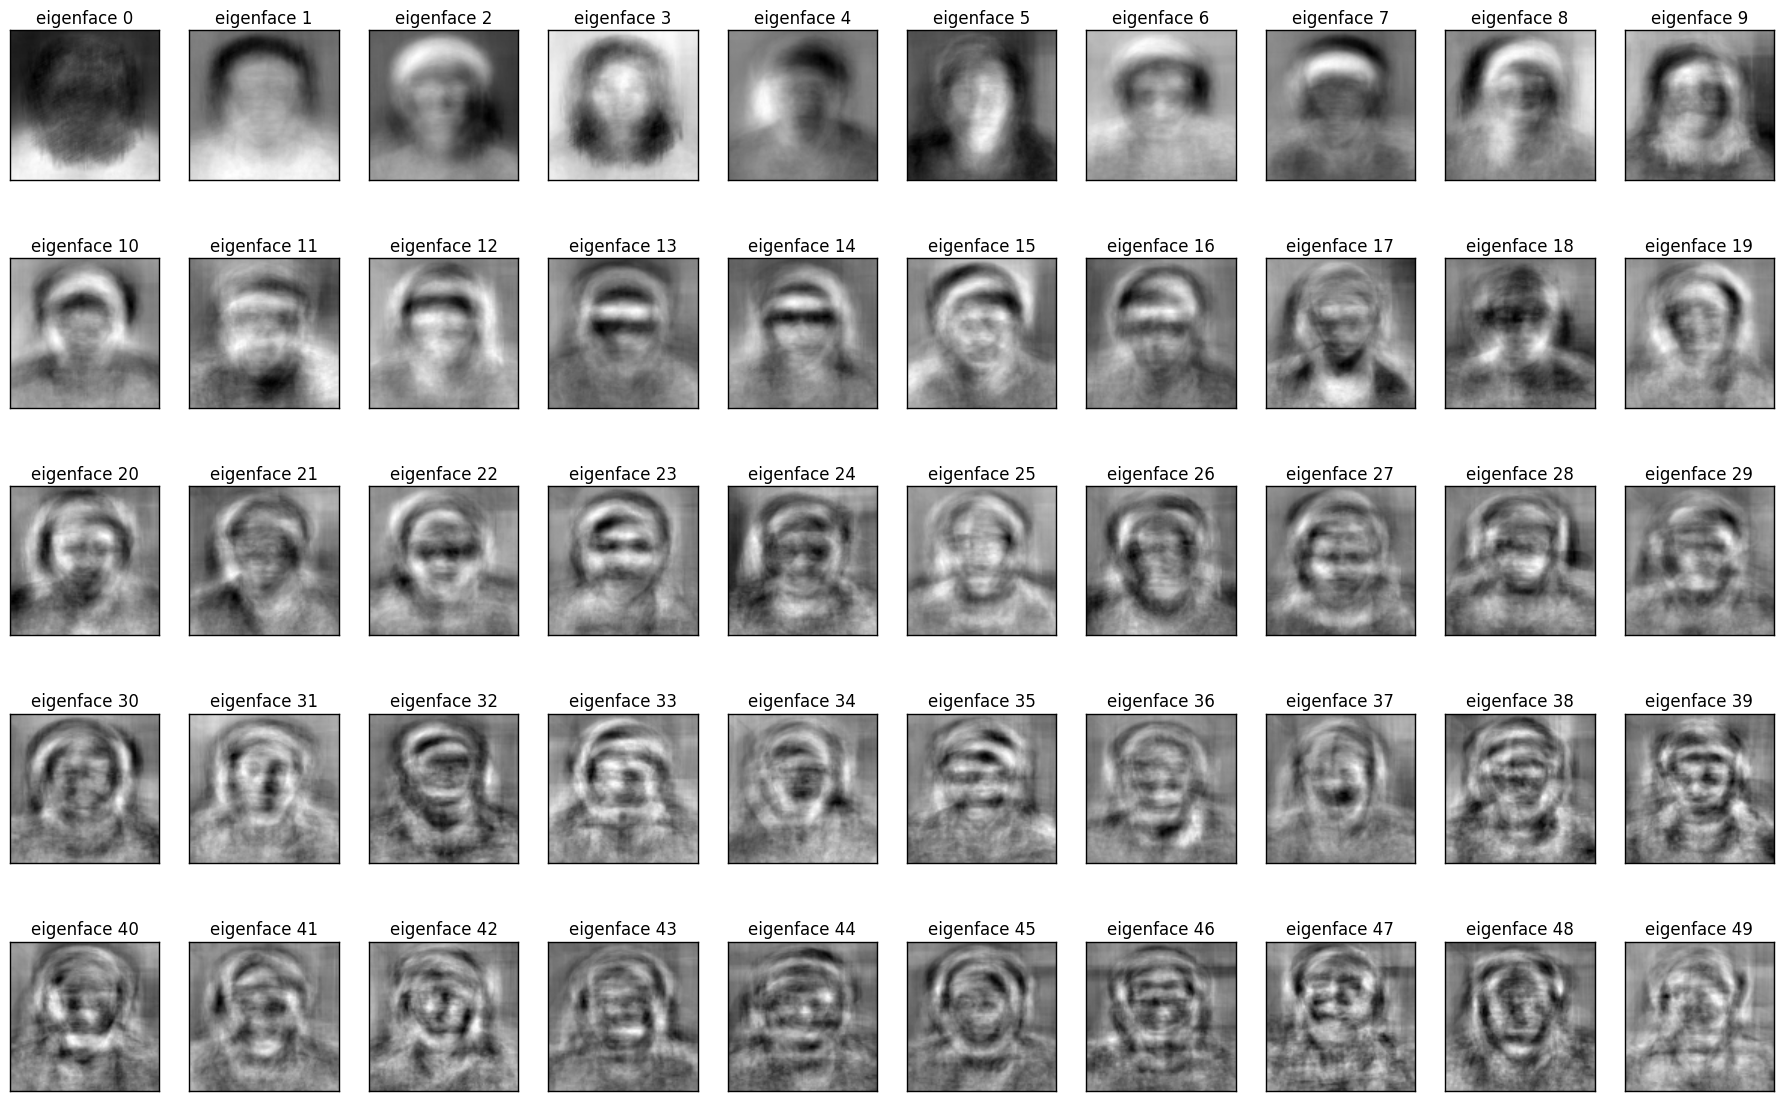

In [24]:
eigenfaces  = tempPCA.components_.reshape((50,100,100))
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])] 
plot_gallery(eigenfaces, eigenface_titles, 100, 100)
plt.show()

In [25]:
len(unqiue_label)

39

In [26]:
x=x/100

y = []

for label_ in label:
    onel = np.zeros(39,dtype=int)
    np.put(onel,unqiue_label.index(label_),1)
    y.append(onel)
    
y = np.array(y)

In [27]:
from keras.layers import Dropout,Input
from keras.models import Model

input_feature_vector = Input(shape=(50,),name='input_layer')
X = Dense(128, activation='relu',name= 'layer_1')(input_feature_vector)
hidden1 = Dense(128,activation='relu',name= 'layer_2')(X)
Y = Dense(39,activation= 'softmax',name= 'output_layer')(hidden1)

model = Model(input_feature_vector, Y)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     (None, 50)                0         
_________________________________________________________________
layer_1 (Dense)              (None, 128)               6528      
_________________________________________________________________
layer_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
output_layer (Dense)         (None, 39)                5031      
Total params: 28,071
Trainable params: 28,071
Non-trainable params: 0
_________________________________________________________________


In [28]:
from keras import optimizers

adam = optimizers.Adam(lr=0.001)

model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
model.fit(x, y, epochs=15, batch_size=16)

Epoch 1/15
584/584 [==============================] - 0s - loss: 5.2637 - acc: 0.0942     
Epoch 2/15
584/584 [==============================] - 0s - loss: 2.0203 - acc: 0.5000     
Epoch 3/15
584/584 [==============================] - 0s - loss: 1.0176 - acc: 0.7620     
Epoch 4/15
584/584 [==============================] - 0s - loss: 0.6144 - acc: 0.8682     
Epoch 5/15
584/584 [==============================] - 0s - loss: 0.4103 - acc: 0.9195     
Epoch 6/15
584/584 [==============================] - 0s - loss: 0.2748 - acc: 0.9503     
Epoch 7/15
584/584 [==============================] - 0s - loss: 0.2053 - acc: 0.9692     
Epoch 8/15
584/584 [==============================] - 0s - loss: 0.1468 - acc: 0.9777     
Epoch 9/15
584/584 [==============================] - 0s - loss: 0.1111 - acc: 0.9897     
Epoch 10/15
584/584 [==============================] - 0s - loss: 0.0857 - acc: 0.9932     
Epoch 11/15
584/584 [==============================] - 0s - loss: 0.0653 - acc: 0.9949   

In [32]:
timage =  cv2.imread('bansi1.JPG')
tgray = cv2.cvtColor(timage, cv2.COLOR_BGR2GRAY)  
tresize = cv2.resize(tgray,(100,100),interpolation = cv2.INTER_AREA)   
tNP = np.array(tresize)
tNP = tNP.flatten()
x = tempPCA.transform(tNP.reshape(1,10000))
print(x.shape)

(1, 50)


In [33]:
x=x/100
out = model.predict(x)

out_temp = out

#print (out_temp)
out_temp = np.argsort(out_temp)[0][-10:]
print (out_temp)

print(out)
maxid  =np.argmax(out)

for out in out_temp:
    print(unqiue_label[out])

[18 30 23 21 31 28 36 32 29 13]
[[  1.78335711e-08   2.91667948e-06   1.83631209e-06   2.08582179e-07
    2.09521815e-07   1.92595408e-07   2.38686221e-06   3.40120073e-06
    1.96235064e-07   5.95491929e-06   2.92037021e-06   2.11956404e-07
    3.01973074e-07   9.98375297e-01   1.68718657e-08   4.82473581e-08
    4.90563593e-07   2.25449625e-07   1.67120743e-05   3.06843594e-06
    5.23857970e-08   2.97530241e-05   1.00066279e-06   2.83055651e-05
    1.08473806e-10   1.56107127e-08   1.57888996e-06   7.12981745e-08
    5.53368482e-05   1.09323824e-03   2.26311295e-05   4.86180033e-05
    1.60272961e-04   1.68133113e-07   1.47399859e-07   7.96872115e-08
    1.29555803e-04   2.74927192e-08   1.25638726e-05]]
201501039
201501088
201501060
201501054
201501091
201501079
201501109
201501095
201501086
201501028
